In [ ]:
aa=[(1).bit_length(),
(1).bit_length(),
(1).bit_length(),
(2).bit_length(),
(3).bit_length(),
(8).bit_length(),
(14).bit_length(),
(42).bit_length(),
(81).bit_length(),
(262).bit_length(),
(538).bit_length(),
(1828).bit_length(),
(3926).bit_length(),
(13820).bit_length(),
(30694).bit_length(),
(110954).bit_length(),
(252939).bit_length(),
(933458).bit_length(),
(2172830).bit_length(),
(8152860).bit_length(),
(19304190).bit_length(),
(73424650).bit_length(),
(176343390).bit_length(),
(678390116).bit_length(),
(1649008456).bit_length(),
(6405031050).bit_length(),
(15730575554).bit_length(),
(61606881612).bit_length(),
(152663683494).bit_length(),
(602188541928).bit_length(),
(1503962954930).bit_length(),
(5969806669034).bit_length(),
(15012865733351).bit_length(),
(59923200729046).bit_length(),
(151622652413194).bit_length(),
(608188709574124).bit_length(),
(1547365078534578).bit_length(),
(6234277838531806).bit_length(),
(15939972379349178).bit_length(),
(64477712119584604).bit_length(),
(165597452660771610).bit_length(),
(672265814872772972).bit_length(),
(1733609081727968492).bit_length(),
(7060941974458061392).bit_length(),
(18276178714484582264).bit_length(),
(74661728661167809752).bit_length(),
(193909492888406631692).bit_length(),
(794337831754570367812).bit_length(),
(2069504277256274074724).bit_length(),
(8499066628515413229282).bit_length(),
(22206891674746169557410).bit_length(),
(91412898898828176826244).bit_length(),
(239489513356610743216954).bit_length(),
(987975910996038555989486).bit_length(),
(2594805632585289523975474).bit_length(),
(10726008363361842734385644).bit_length()]

aa.reverse()

bb=[]

ww = aa.pop(0)

for rr in aa:
    bb.append(ww-rr)
    ww=rr

print(bb)
print(max(bb))


In [ ]:
aa=[(1).bit_length(),
(1).bit_length(),
(2).bit_length(),
(4).bit_length(),
(10).bit_length(),
(24).bit_length(),
(66).bit_length(),
(174).bit_length(),
(504).bit_length(),
(1406).bit_length(),
(4210).bit_length(),
(12198).bit_length(),
(37378).bit_length(),
(111278).bit_length(),
(346846).bit_length(),
(1053874).bit_length(),
(3328188).bit_length(),
(10274466).bit_length(),
(32786630).bit_length(),
(102511418).bit_length(),
(329903058).bit_length(),
(1042277722).bit_length(),
(3377919260).bit_length(),
(10765024432).bit_length(),
(35095839848).bit_length(),
(112670468128).bit_length(),
(369192702554).bit_length(),
(1192724674590).bit_length(),
(3925446804750).bit_length(),
(12750985286162).bit_length(),
(42126805350798).bit_length(),
(137494070309894).bit_length(),
(455792943581400).bit_length(),
(1493892615824866).bit_length(),
(4967158911871358).bit_length(),
(16341143303881194).bit_length(),
(54480174340453578).bit_length(),
(179830726231355326).bit_length(),
(600994488311709056).bit_length(),
(1989761816656666392).bit_length(),
(6664356253639465480).bit_length(),
(22124273546267785420).bit_length(),
(74248957195109578520).bit_length(),
(247100408917982623532).bit_length(),
(830776205506531894760).bit_length(),
]

aa.reverse()

bb=[]

ww = aa.pop(0)

for rr in aa:
    bb.append(ww-rr)
    ww=rr

print(bb)
print(max(bb))

# Analysis of Bit Length for Sequence b005316

This notebook analyzes the bit length of values in sequence b005316 and derives a formula to estimate `bit_length(a(n))` as a function of `n`.

The data consists of pairs (n, a(n)) where we need to find a mathematical relationship between n and the bit length of a(n), excluding values where n < 5.

## Import Required Libraries

Import necessary libraries including pandas, numpy, matplotlib, seaborn, and sklearn for data analysis and modeling.

In [1]:
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

## Load and Parse Data

Read the data file and parse it into a pandas DataFrame with columns 'n' and 'a_n'.

In [2]:
# Load the data from the cache file
dataFilePath = Path("../.cache/b005316.txt")
dataRaw = []

with open(dataFilePath, 'r') as file:
    for line in file:
        line = line.strip()
        if line:
            parts = line.split()
            if len(parts) == 2:
                n = int(parts[0])
                aN = int(parts[1])
                dataRaw.append({'n': n, 'a_n': aN})

# Create DataFrame
dataFrame = pd.DataFrame(dataRaw)
print(f"Loaded {len(dataFrame)} data points")
print("\nFirst few rows:")
print(dataFrame.head(10))

Loaded 56 data points

First few rows:
   n  a_n
0  0    1
1  1    1
2  2    1
3  3    2
4  4    3
5  5    8
6  6   14
7  7   42
8  8   81
9  9  262


## Calculate Bit Lengths

Calculate the bit length of each a(n) value using Python's bit_length() method and add it as a new column.

In [3]:
# Calculate bit length for each a(n) value
dataFrame['bitLength'] = dataFrame['a_n'].apply(lambda x: x.bit_length())

print("Data with bit lengths:")
print(dataFrame.head(10))
print(f"\nBit length statistics:")
print(dataFrame['bitLength'].describe())

Data with bit lengths:
   n  a_n  bitLength
0  0    1          1
1  1    1          1
2  2    1          1
3  3    2          2
4  4    3          2
5  5    8          4
6  6   14          4
7  7   42          6
8  8   81          7
9  9  262          9

Bit length statistics:
count    56.000000
mean     38.178571
std      25.859134
min       1.000000
25%      14.750000
50%      37.000000
75%      60.250000
max      84.000000
Name: bitLength, dtype: float64


## Filter Data (n >= 5)

Filter the dataset to exclude values where n < 5 as specified in the requirements.

In [4]:
# Filter data to exclude n < 5
dataFiltered = dataFrame[dataFrame['n'] >= 5].reset_index(drop=True)

print(f"Original data points: {len(dataFrame)}")
print(f"Filtered data points (n >= 5): {len(dataFiltered)}")
print("\nFiltered data preview:")
print(dataFiltered.head(10))

Original data points: 56
Filtered data points (n >= 5): 51

Filtered data preview:
    n    a_n  bitLength
0   5      8          4
1   6     14          4
2   7     42          6
3   8     81          7
4   9    262          9
5  10    538         10
6  11   1828         11
7  12   3926         12
8  13  13820         14
9  14  30694         15


## Exploratory Data Analysis

Perform initial data exploration including summary statistics, data visualization, and identifying patterns in the bit length growth.

Summary statistics for filtered data:
               n  bitLength
count  51.000000  51.000000
mean   30.000000  41.784314
std    14.866069  24.228342
min     5.000000   4.000000
25%    17.500000  21.000000
50%    30.000000  41.000000
75%    42.500000  62.000000
max    55.000000  84.000000


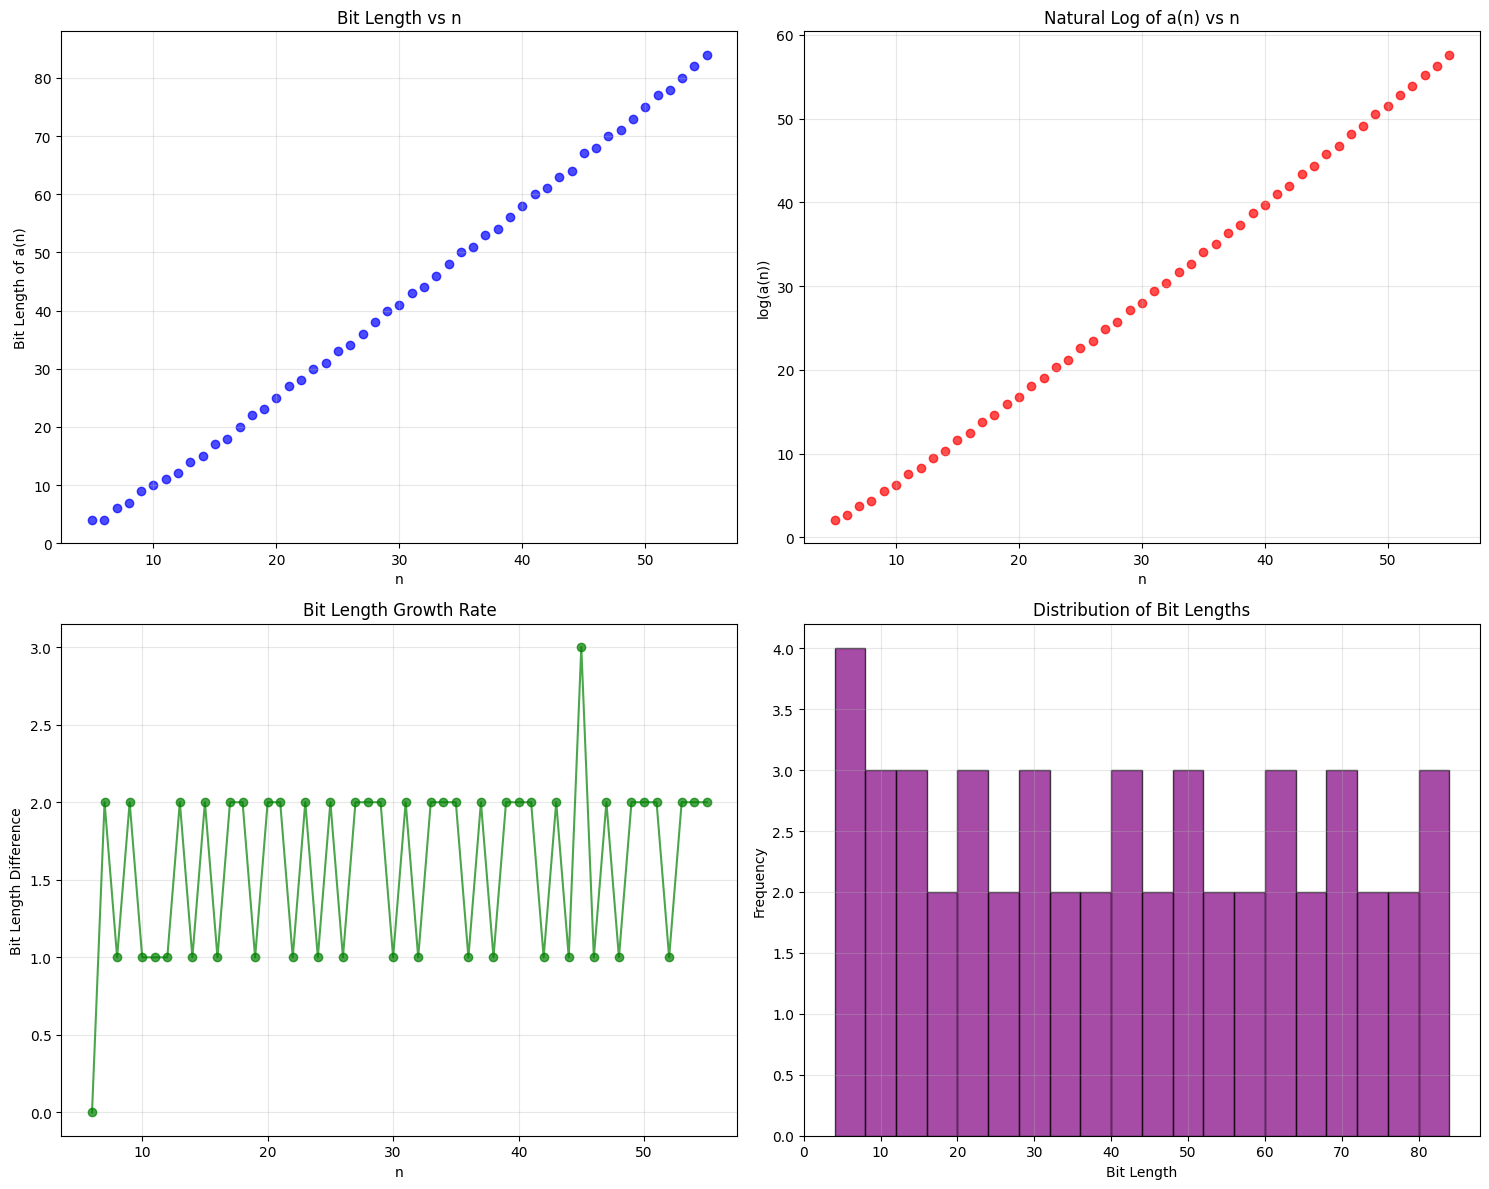


Correlation between n and bit_length: 0.9994
Correlation between n and log(a_n): 0.9995


In [7]:
# Basic statistics
print("Summary statistics for filtered data:")
print(dataFiltered.describe())

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: n vs bit_length
axes[0, 0].scatter(dataFiltered['n'], dataFiltered['bitLength'], alpha=0.7, color='blue')
axes[0, 0].set_xlabel('n')
axes[0, 0].set_ylabel('Bit Length of a(n)')
axes[0, 0].set_title('Bit Length vs n')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: log(a(n)) vs n to see exponential growth
import math
logValues = [math.log(val) for val in dataFiltered['a_n']]
axes[0, 1].scatter(dataFiltered['n'], logValues, alpha=0.7, color='red')
axes[0, 1].set_xlabel('n')
axes[0, 1].set_ylabel('log(a(n))')
axes[0, 1].set_title('Natural Log of a(n) vs n')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Bit length differences between consecutive terms
bitLengthDiff = dataFiltered['bitLength'].diff().dropna()
axes[1, 0].plot(dataFiltered['n'][1:], bitLengthDiff, marker='o', alpha=0.7, color='green')
axes[1, 0].set_xlabel('n')
axes[1, 0].set_ylabel('Bit Length Difference')
axes[1, 0].set_title('Bit Length Growth Rate')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Distribution of bit lengths
axes[1, 1].hist(dataFiltered['bitLength'], bins=20, alpha=0.7, color='purple', edgecolor='black')
axes[1, 1].set_xlabel('Bit Length')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Bit Lengths')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Correlation analysis
correlationBitLength = dataFiltered['n'].corr(dataFiltered['bitLength'])
correlationLogAN = np.corrcoef(dataFiltered['n'], logValues)[0, 1]
print(f"\nCorrelation between n and bit_length: {correlationBitLength:.4f}")
print(f"Correlation between n and log(a_n): {correlationLogAN:.4f}")

## Linear Regression Analysis

Fit a linear regression model to predict bit length as a function of n and evaluate its performance.

Linear Regression Results:
Formula: bit_length ≈ 1.6288 * n + -7.0790
R² Score: 0.9988
RMSE: 0.8387
MAE: 0.6627


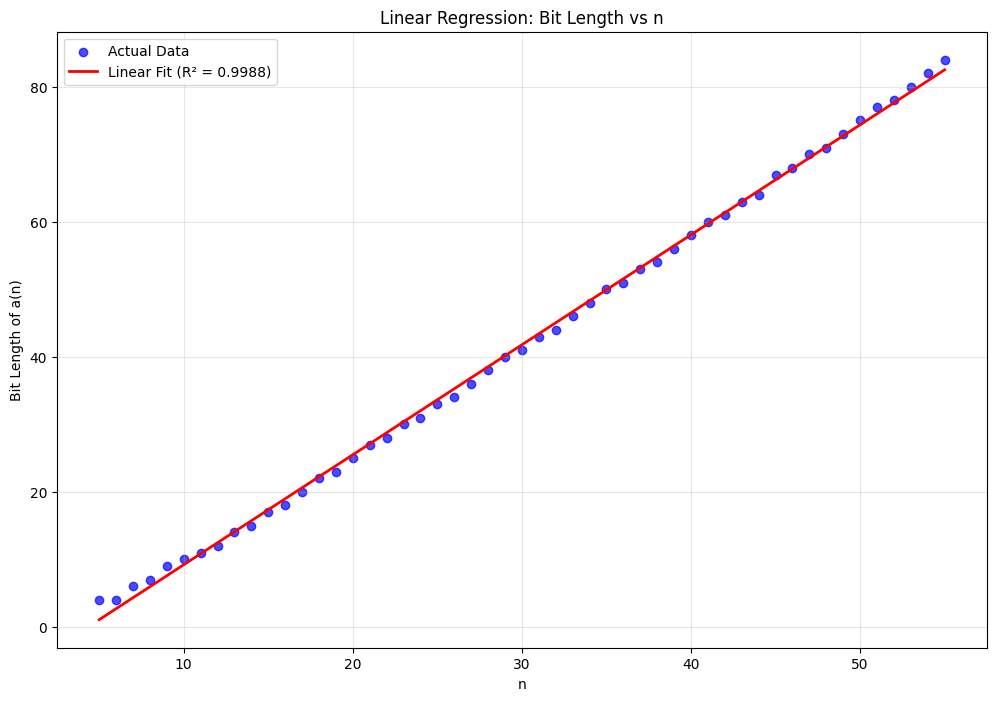

In [8]:
# Prepare data for linear regression
X = dataFiltered['n'].values.reshape(-1, 1)
y = dataFiltered['bitLength'].values

# Fit linear regression model
linearModel = LinearRegression()
linearModel.fit(X, y)

# Make predictions
yPredLinear = linearModel.predict(X)

# Calculate metrics
r2Linear = r2_score(y, yPredLinear)
rmseLinear = np.sqrt(mean_squared_error(y, yPredLinear))
maeLinear = mean_absolute_error(y, yPredLinear)

print("Linear Regression Results:")
print(f"Formula: bit_length ≈ {linearModel.coef_[0]:.4f} * n + {linearModel.intercept_:.4f}")
print(f"R² Score: {r2Linear:.4f}")
print(f"RMSE: {rmseLinear:.4f}")
print(f"MAE: {maeLinear:.4f}")

# Visualize linear fit
plt.figure(figsize=(12, 8))
plt.scatter(dataFiltered['n'], dataFiltered['bitLength'], alpha=0.7, label='Actual Data', color='blue')
plt.plot(dataFiltered['n'], yPredLinear, color='red', linewidth=2, label=f'Linear Fit (R² = {r2Linear:.4f})')
plt.xlabel('n')
plt.ylabel('Bit Length of a(n)')
plt.title('Linear Regression: Bit Length vs n')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Polynomial Regression Analysis

Test polynomial regression models of different degrees to find the best fit for the bit length data.

Polynomial Degree 2:
  R² Score: 0.9996
  RMSE: 0.4582
  MAE: 0.3541

Polynomial Degree 3:
  R² Score: 0.9997
  RMSE: 0.3904
  MAE: 0.3210

Polynomial Degree 4:
  R² Score: 0.9998
  RMSE: 0.3463
  MAE: 0.2853

Polynomial Degree 5:
  R² Score: 0.9998
  RMSE: 0.3445
  MAE: 0.2838



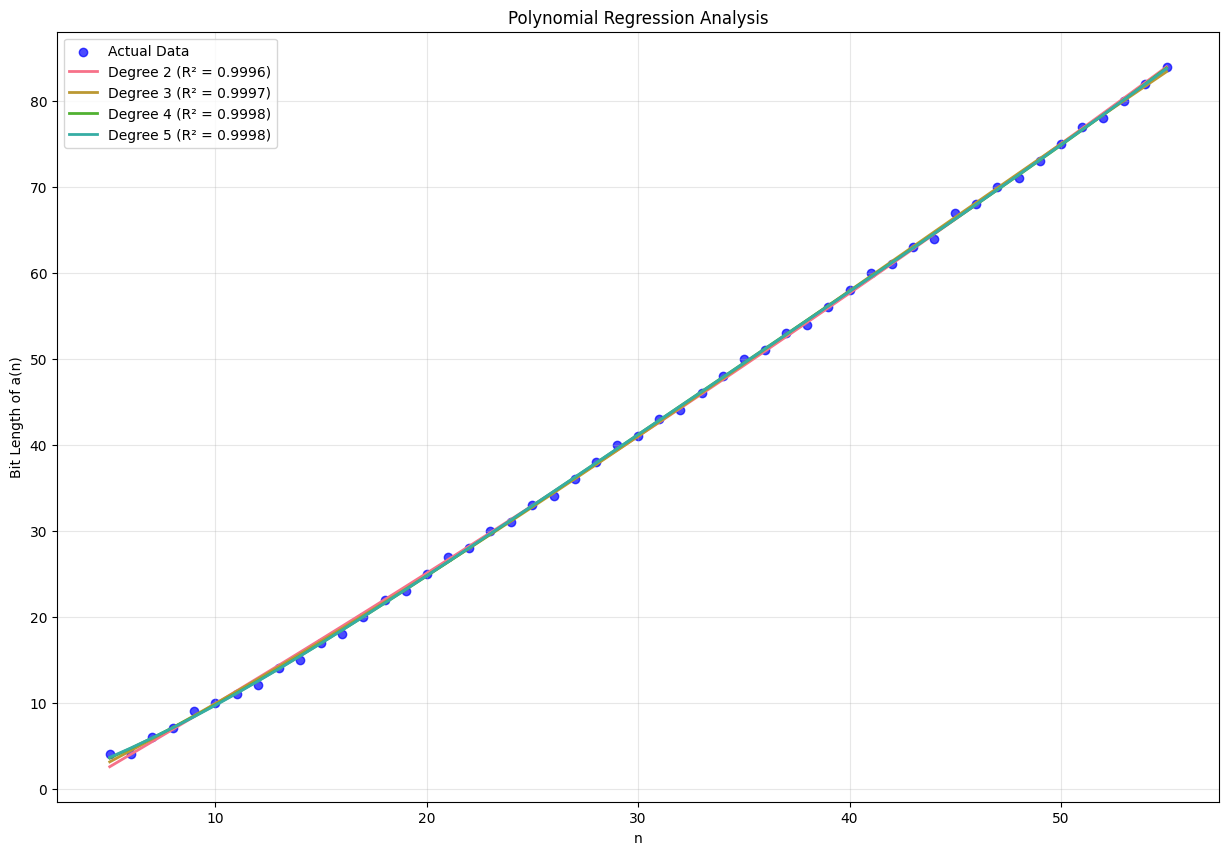

Best polynomial degree: 5 with R² = 0.9998


In [9]:
# Test polynomial regression with different degrees
degrees = [2, 3, 4, 5]
polynomialResults = {}

plt.figure(figsize=(15, 10))
plt.scatter(dataFiltered['n'], dataFiltered['bitLength'], alpha=0.7, label='Actual Data', color='blue')

for degree in degrees:
    # Create polynomial features
    polyFeatures = PolynomialFeatures(degree=degree)
    XPoly = polyFeatures.fit_transform(X)

    # Fit polynomial regression
    polyModel = LinearRegression()
    polyModel.fit(XPoly, y)

    # Make predictions
    yPredPoly = polyModel.predict(XPoly)

    # Calculate metrics
    r2Poly = r2_score(y, yPredPoly)
    rmsePoly = np.sqrt(mean_squared_error(y, yPredPoly))
    maePoly = mean_absolute_error(y, yPredPoly)

    # Store results
    polynomialResults[degree] = {
        'model': polyModel,
        'poly_features': polyFeatures,
        'r2': r2Poly,
        'rmse': rmsePoly,
        'mae': maePoly,
        'predictions': yPredPoly
    }

    # Plot
    plt.plot(dataFiltered['n'], yPredPoly, linewidth=2, label=f'Degree {degree} (R² = {r2Poly:.4f})')

    print(f"Polynomial Degree {degree}:")
    print(f"  R² Score: {r2Poly:.4f}")
    print(f"  RMSE: {rmsePoly:.4f}")
    print(f"  MAE: {maePoly:.4f}")
    print()

plt.xlabel('n')
plt.ylabel('Bit Length of a(n)')
plt.title('Polynomial Regression Analysis')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Find best polynomial degree
bestDegree = max(polynomialResults.keys(), key=lambda d: polynomialResults[d]['r2'])
print(f"Best polynomial degree: {bestDegree} with R² = {polynomialResults[bestDegree]['r2']:.4f}")

## Logarithmic and Exponential Models

Explore logarithmic and exponential relationship models between n and bit length, including log-linear transformations.

Logarithmic Model Results:
Formula: bit_length ≈ 36.2667 * log(n) + -75.6554
R² Score: 0.8989
RMSE: 7.6293
MAE: 6.4909

Exponential Model Results:
Formula: bit_length ≈ exp(0.051936 * n + 1.9246)
R² Score: 0.7964
RMSE: 10.8255
MAE: 7.7770

n*log(n) Model Results:
Formula: bit_length ≈ 0.377014 * n * log(n) + 1.8253
R² Score: 0.9989
RMSE: 0.7783
MAE: 0.6723


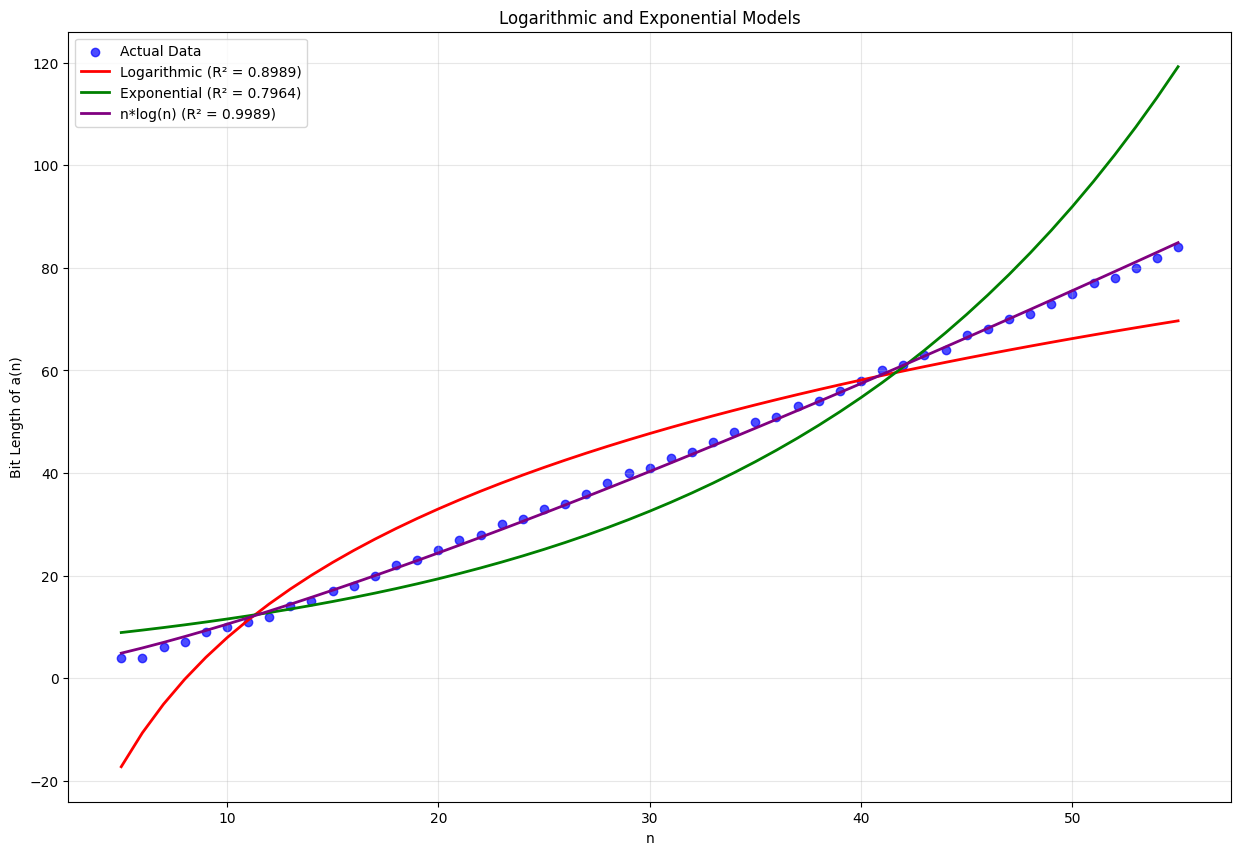

In [10]:
# Test logarithmic models
# Model 1: bit_length = a * log(n) + b
XLog = np.log(dataFiltered['n']).values.reshape(-1, 1)
logModel = LinearRegression()
logModel.fit(XLog, y)
yPredLog = logModel.predict(XLog)

r2Log = r2_score(y, yPredLog)
rmseLog = np.sqrt(mean_squared_error(y, yPredLog))
maeLog = mean_absolute_error(y, yPredLog)

print("Logarithmic Model Results:")
print(f"Formula: bit_length ≈ {logModel.coef_[0]:.4f} * log(n) + {logModel.intercept_:.4f}")
print(f"R² Score: {r2Log:.4f}")
print(f"RMSE: {rmseLog:.4f}")
print(f"MAE: {maeLog:.4f}")
print()

# Model 2: log(bit_length) = a * n + b (exponential growth)
# First, handle zero bit lengths (though there shouldn't be any in our data)
yLogBitLength = np.log(dataFiltered['bitLength'])
expModel = LinearRegression()
expModel.fit(X, yLogBitLength)
yPredLogBit = expModel.predict(X)
yPredExp = np.exp(yPredLogBit)

r2Exp = r2_score(y, yPredExp)
rmseExp = np.sqrt(mean_squared_error(y, yPredExp))
maeExp = mean_absolute_error(y, yPredExp)

print("Exponential Model Results:")
print(f"Formula: bit_length ≈ exp({expModel.coef_[0]:.6f} * n + {expModel.intercept_:.4f})")
print(f"R² Score: {r2Exp:.4f}")
print(f"RMSE: {rmseExp:.4f}")
print(f"MAE: {maeExp:.4f}")
print()

# Model 3: bit_length = a * n * log(n) + b (n log n model)
XNLogN = (dataFiltered['n'] * np.log(dataFiltered['n'])).values.reshape(-1, 1)
nLogNModel = LinearRegression()
nLogNModel.fit(XNLogN, y)
yPredNLogN = nLogNModel.predict(XNLogN)

r2NLogN = r2_score(y, yPredNLogN)
rmseNLogN = np.sqrt(mean_squared_error(y, yPredNLogN))
maeNLogN = mean_absolute_error(y, yPredNLogN)

print("n*log(n) Model Results:")
print(f"Formula: bit_length ≈ {nLogNModel.coef_[0]:.6f} * n * log(n) + {nLogNModel.intercept_:.4f}")
print(f"R² Score: {r2NLogN:.4f}")
print(f"RMSE: {rmseNLogN:.4f}")
print(f"MAE: {maeNLogN:.4f}")

# Visualize all logarithmic/exponential models
plt.figure(figsize=(15, 10))
plt.scatter(dataFiltered['n'], dataFiltered['bitLength'], alpha=0.7, label='Actual Data', color='blue')
plt.plot(dataFiltered['n'], yPredLog, color='red', linewidth=2, label=f'Logarithmic (R² = {r2Log:.4f})')
plt.plot(dataFiltered['n'], yPredExp, color='green', linewidth=2, label=f'Exponential (R² = {r2Exp:.4f})')
plt.plot(dataFiltered['n'], yPredNLogN, color='purple', linewidth=2, label=f'n*log(n) (R² = {r2NLogN:.4f})')

plt.xlabel('n')
plt.ylabel('Bit Length of a(n)')
plt.title('Logarithmic and Exponential Models')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Model Comparison and Evaluation

Compare different models using metrics like R-squared, RMSE, and MAE to determine the best performing model.

Model Comparison (sorted by R² Score):
       Model  R² Score      RMSE      MAE
Polynomial 5  0.999794  0.344533 0.283766
Polynomial 4  0.999792  0.346265 0.285322
Polynomial 3  0.999735  0.390352 0.321002
Polynomial 2  0.999635  0.458160 0.354096
    n*log(n)  0.998947  0.778321 0.672315
      Linear  0.998778  0.838719 0.662659
 Logarithmic  0.898859  7.629331 6.490880
 Exponential  0.796367 10.825490 7.776975


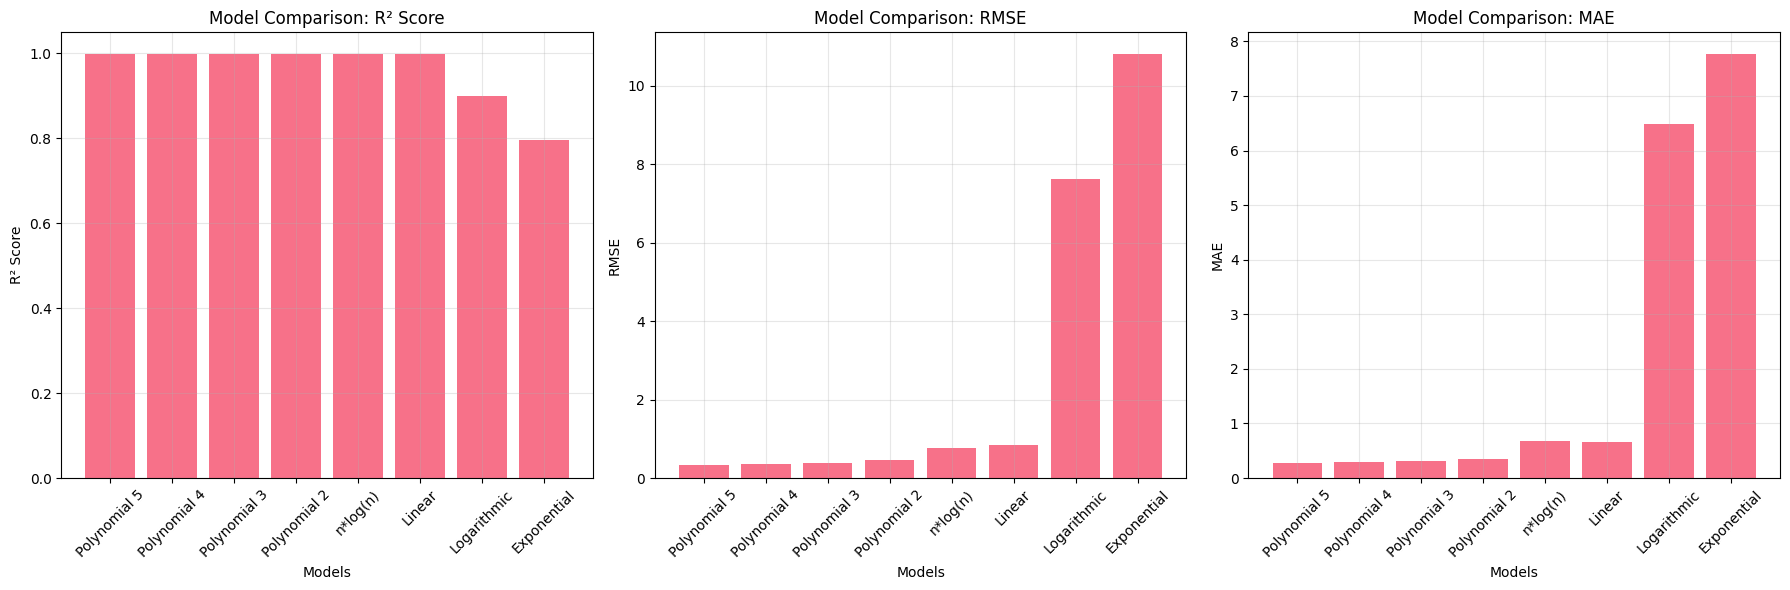


Best performing model: Polynomial 5 with R² = 0.999794


In [11]:
# Compile all model results
modelResults = {
    'Linear': {'r2': r2Linear, 'rmse': rmseLinear, 'mae': maeLinear},
    'Logarithmic': {'r2': r2Log, 'rmse': rmseLog, 'mae': maeLog},
    'Exponential': {'r2': r2Exp, 'rmse': rmseExp, 'mae': maeExp},
    'n*log(n)': {'r2': r2NLogN, 'rmse': rmseNLogN, 'mae': maeNLogN}
}

# Add polynomial results
for degree in polynomialResults:
    modelResults[f'Polynomial {degree}'] = {
        'r2': polynomialResults[degree]['r2'],
        'rmse': polynomialResults[degree]['rmse'],
        'mae': polynomialResults[degree]['mae']
    }

# Create comparison DataFrame
comparisonData = []
for modelName, metrics in modelResults.items():
    comparisonData.append({
        'Model': modelName,
        'R² Score': metrics['r2'],
        'RMSE': metrics['rmse'],
        'MAE': metrics['mae']
    })

comparisonDataFrame = pd.DataFrame(comparisonData)
comparisonDataFrame = comparisonDataFrame.sort_values('R² Score', ascending=False)

print("Model Comparison (sorted by R² Score):")
print(comparisonDataFrame.to_string(index=False, float_format='%.6f'))

# Visualize model comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# R² comparison
axes[0].bar(range(len(comparisonDataFrame)), comparisonDataFrame['R² Score'])
axes[0].set_xlabel('Models')
axes[0].set_ylabel('R² Score')
axes[0].set_title('Model Comparison: R² Score')
axes[0].set_xticks(range(len(comparisonDataFrame)))
axes[0].set_xticklabels(comparisonDataFrame['Model'], rotation=45)
axes[0].grid(True, alpha=0.3)

# RMSE comparison
axes[1].bar(range(len(comparisonDataFrame)), comparisonDataFrame['RMSE'])
axes[1].set_xlabel('Models')
axes[1].set_ylabel('RMSE')
axes[1].set_title('Model Comparison: RMSE')
axes[1].set_xticks(range(len(comparisonDataFrame)))
axes[1].set_xticklabels(comparisonDataFrame['Model'], rotation=45)
axes[1].grid(True, alpha=0.3)

# MAE comparison
axes[2].bar(range(len(comparisonDataFrame)), comparisonDataFrame['MAE'])
axes[2].set_xlabel('Models')
axes[2].set_ylabel('MAE')
axes[2].set_title('Model Comparison: MAE')
axes[2].set_xticks(range(len(comparisonDataFrame)))
axes[2].set_xticklabels(comparisonDataFrame['Model'], rotation=45)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Identify best model
bestModel = comparisonDataFrame.iloc[0]['Model']
bestR2 = comparisonDataFrame.iloc[0]['R² Score']
print(f"\nBest performing model: {bestModel} with R² = {bestR2:.6f}")

## Formula Derivation and Validation

Derive the final formula for estimating bit_length(a(n)) and validate it against the original data.

In [12]:
# Derive the final formula based on best model
if bestModel.startswith('Polynomial'):
    degree = int(bestModel.split()[-1])
    bestPolyModel = polynomialResults[degree]['model']
    bestPolyFeatures = polynomialResults[degree]['poly_features']

    print(f"Best Model: Polynomial Regression (Degree {degree})")
    print(f"R² Score: {polynomialResults[degree]['r2']:.6f}")
    print()

    # Get polynomial coefficients
    coefficients = bestPolyModel.coef_
    intercept = bestPolyModel.intercept_

    print("Final Formula:")
    print(f"bit_length(a(n)) ≈ {intercept:.6f}", end="")
    for i, coef in enumerate(coefficients[1:], 1):  # Skip the constant term (x^0)
        if coef >= 0:
            print(f" + {coef:.6f} * n^{i}", end="")
        else:
            print(f" - {abs(coef):.6f} * n^{i}", end="")
    print()
    print()

    # Create a function for easy estimation
    def estimateBitLength(n: int) -> float:
        nArray = np.array([[n]])
        nPoly = bestPolyFeatures.transform(nArray)
        return bestPolyModel.predict(nPoly)[0]

elif bestModel == 'Linear':
    print(f"Best Model: Linear Regression")
    print(f"R² Score: {r2Linear:.6f}")
    print()
    print("Final Formula:")
    print(f"bit_length(a(n)) ≈ {linearModel.coef_[0]:.6f} * n + {linearModel.intercept_:.6f}")
    print()

    def estimateBitLength(n: int) -> float:
        return linearModel.coef_[0] * n + linearModel.intercept_

elif bestModel == 'n*log(n)':
    print(f"Best Model: n*log(n) Regression")
    print(f"R² Score: {r2NLogN:.6f}")
    print()
    print("Final Formula:")
    print(f"bit_length(a(n)) ≈ {nLogNModel.coef_[0]:.6f} * n * log(n) + {nLogNModel.intercept_:.6f}")
    print()

    def estimateBitLength(n: int) -> float:
        return nLogNModel.coef_[0] * n * np.log(n) + nLogNModel.intercept_

# Validate the formula with some test cases
print("Validation Examples:")
print("n\tActual\tEstimated\tError")
print("-" * 35)

testIndices = [0, 10, 20, 30, 40, -1]  # Include first, middle, and last values
for idx in testIndices:
    n = dataFiltered.iloc[idx]['n']
    actualBitLength = dataFiltered.iloc[idx]['bitLength']
    estimatedBitLength = estimateBitLength(n)
    error = abs(actualBitLength - estimatedBitLength)

    print(f"{n}\t{actualBitLength}\t{estimatedBitLength:.2f}\t\t{error:.2f}")

# Calculate overall validation metrics
allEstimates = [estimateBitLength(n) for n in dataFiltered['n']]
validationR2 = r2_score(dataFiltered['bitLength'], allEstimates)
validationRMSE = np.sqrt(mean_squared_error(dataFiltered['bitLength'], allEstimates))

print(f"\nOverall Validation:")
print(f"R² Score: {validationR2:.6f}")
print(f"RMSE: {validationRMSE:.6f}")

Best Model: Polynomial Regression (Degree 5)
R² Score: 0.999794

Final Formula:
bit_length(a(n)) ≈ -0.524538 + 0.583005 * n^1 + 0.056886 * n^2 - 0.001472 * n^3 + 0.000018 * n^4 - 0.000000 * n^5

Validation Examples:
n	Actual	Estimated	Error
-----------------------------------
5	4	3.64		0.36
15	17	16.91		0.09
25	33	32.93		0.07
35	50	49.50		0.50
45	67	66.28		0.72
55	84	83.78		0.22

Overall Validation:
R² Score: 0.999794
RMSE: 0.344533


## Visualization of Results

Create comprehensive plots showing the original data, fitted models, residuals, and prediction accuracy.

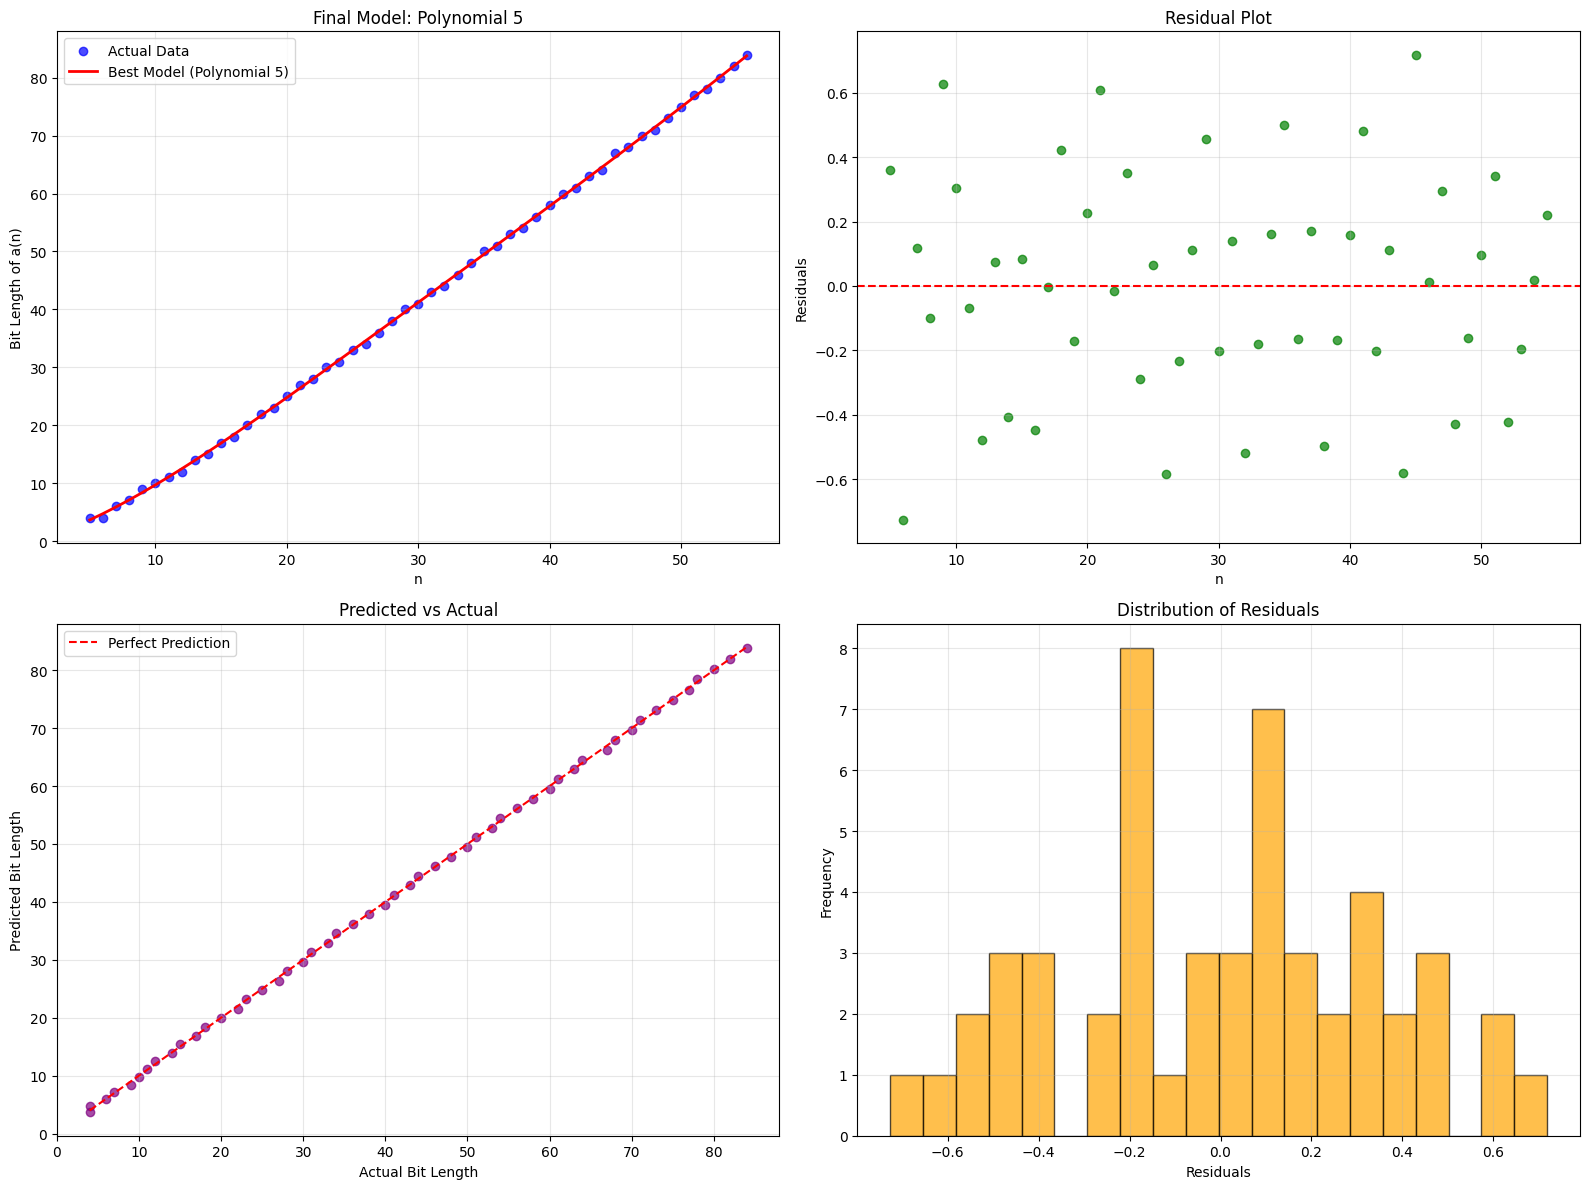

Residual Analysis:
Mean Residual: 0.000000
Standard Deviation of Residuals: 0.344533
Max Absolute Error: 0.726491
95% of predictions within: ±0.618941

FINAL ESTIMATION FUNCTION

def estimateBitLength(n: int) -> float:
    """Estimate the bit length of a(n) for sequence b005316."""
    if n < 5:
        raise ValueError('Formula is only valid for n >= 5')
    
    result = -0.524538
    result += 0.583005 * (n ** 1)
    result += 0.056886 * (n ** 2)
    result -= 0.001472 * (n ** 3)
    result += 0.000018 * (n ** 4)
    result -= 0.000000 * (n ** 5)
    return result

Model R² Score: 0.999794
Model RMSE: 0.344533

This function provides an estimate of bit_length(a(n)) for sequence b005316 when n >= 5.


In [13]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Final model fit
axes[0, 0].scatter(dataFiltered['n'], dataFiltered['bitLength'], alpha=0.7, label='Actual Data', color='blue')
axes[0, 0].plot(dataFiltered['n'], allEstimates, color='red', linewidth=2, label=f'Best Model ({bestModel})')
axes[0, 0].set_xlabel('n')
axes[0, 0].set_ylabel('Bit Length of a(n)')
axes[0, 0].set_title(f'Final Model: {bestModel}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Residuals
residuals = dataFiltered['bitLength'] - allEstimates
axes[0, 1].scatter(dataFiltered['n'], residuals, alpha=0.7, color='green')
axes[0, 1].axhline(y=0, color='red', linestyle='--')
axes[0, 1].set_xlabel('n')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Predicted vs Actual
axes[1, 0].scatter(dataFiltered['bitLength'], allEstimates, alpha=0.7, color='purple')
axes[1, 0].plot([dataFiltered['bitLength'].min(), dataFiltered['bitLength'].max()],
               [dataFiltered['bitLength'].min(), dataFiltered['bitLength'].max()],
               'r--', label='Perfect Prediction')
axes[1, 0].set_xlabel('Actual Bit Length')
axes[1, 0].set_ylabel('Predicted Bit Length')
axes[1, 0].set_title('Predicted vs Actual')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Histogram of residuals
axes[1, 1].hist(residuals, bins=20, alpha=0.7, color='orange', edgecolor='black')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Residuals')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics for residuals
print("Residual Analysis:")
print(f"Mean Residual: {np.mean(residuals):.6f}")
print(f"Standard Deviation of Residuals: {np.std(residuals):.6f}")
print(f"Max Absolute Error: {np.max(np.abs(residuals)):.6f}")
print(f"95% of predictions within: ±{np.percentile(np.abs(residuals), 95):.6f}")

# Create a practical function for users
print("\n" + "="*60)
print("FINAL ESTIMATION FUNCTION")
print("="*60)
print()

if bestModel.startswith('Polynomial'):
    degree = int(bestModel.split()[-1])
    coeffs = polynomialResults[degree]['model'].coef_
    intercept = polynomialResults[degree]['model'].intercept_

    print("def estimateBitLength(n: int) -> float:")
    print('    """Estimate the bit length of a(n) for sequence b005316."""')
    print(f"    if n < 5:")
    print(f"        raise ValueError('Formula is only valid for n >= 5')")
    print(f"    ")
    print(f"    result = {intercept:.6f}")
    for i, coef in enumerate(coeffs[1:], 1):
        if coef >= 0:
            print(f"    result += {coef:.6f} * (n ** {i})")
        else:
            print(f"    result -= {abs(coef):.6f} * (n ** {i})")
    print("    return result")

elif bestModel == 'Linear':
    slope = linearModel.coef_[0]
    intercept = linearModel.intercept_
    print("def estimateBitLength(n: int) -> float:")
    print('    """Estimate the bit length of a(n) for sequence b005316."""')
    print(f"    if n < 5:")
    print(f"        raise ValueError('Formula is only valid for n >= 5')")
    print(f"    return {slope:.6f} * n + {intercept:.6f}")

elif bestModel == 'n*log(n)':
    coef = nLogNModel.coef_[0]
    intercept = nLogNModel.intercept_
    print("def estimateBitLength(n: int) -> float:")
    print('    """Estimate the bit length of a(n) for sequence b005316."""')
    print(f"    if n < 5:")
    print(f"        raise ValueError('Formula is only valid for n >= 5')")
    print(f"    import math")
    print(f"    return {coef:.6f} * n * math.log(n) + {intercept:.6f}")

print()
print(f"Model R² Score: {validationR2:.6f}")
print(f"Model RMSE: {validationRMSE:.6f}")
print()
print("This function provides an estimate of bit_length(a(n)) for sequence b005316 when n >= 5.")